<a href="https://colab.research.google.com/github/jocelynzym/Junior/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

name: Yimiao Zhang

net ID: yz6756

**a.**

In [50]:
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 26 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 84 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


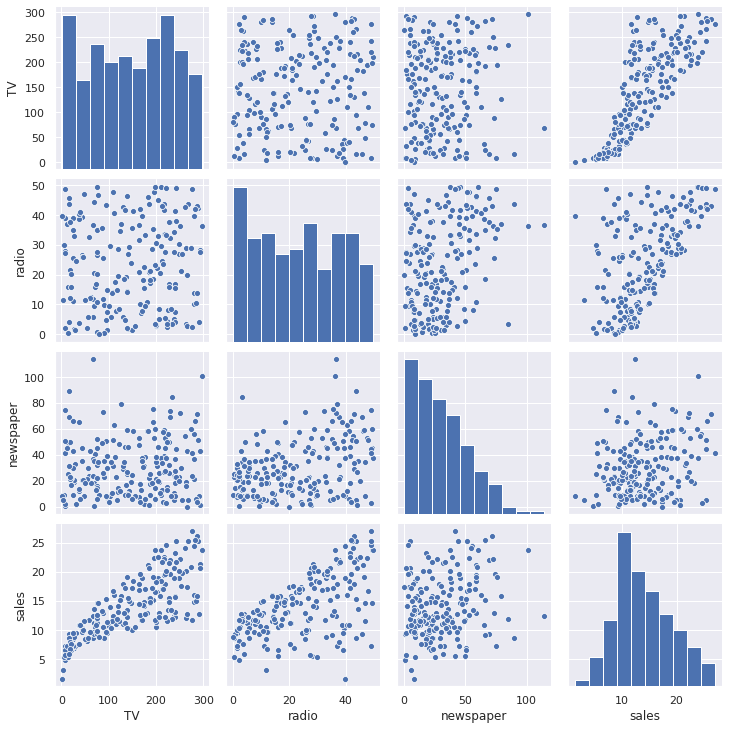

In [51]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()
sns.pairplot(df)
train, test = train_test_split(df, test_size=0.3)
train.info()
test.info()

**Comment:**

1.TV ad budget and radio ad budget seem to be correlated with product sales.

2.Newspaper ad budget and radio ad budget seem to be correlated with one another.

**b.**





TV
coefficients: 0.048068909611794816  intercept: 7.073117112045336
mse_train: 9.950871708360829
r2_train: 0.6192898594065237
mse_test: 11.877438504597645
r2_test: 0.5902940747649248

Radio
coefficients: 0.20972932329521915  intercept: 8.964592427799692
mse_train: 16.699755126450444
r2_train: 0.361084505116701
mse_test: 21.486673172631036
r2_test: 0.25882863472550743

Newspaper
coefficients: 0.05219574388662962  intercept: 12.117031582198075
mse_train: 24.80840215360445
r2_train: 0.05085599044929656
mse_test: 28.025354764899213
r2_test: 0.03328029022843426


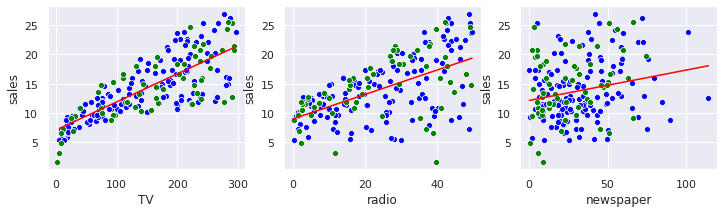

In [52]:
#fit
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])

#plot
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales",color='blue');
sns.scatterplot(data=test, x="TV", y="sales",color='green');
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales",color='blue');
sns.scatterplot(data=test, x="radio", y="sales",color='green');
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales",color='blue');
sns.scatterplot(data=test, x="newspaper", y="sales",color='green');
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#info on training data
y_pred_tv_train = reg_tv.predict(train[['TV']])
y_pred_radio_train = reg_radio.predict(train[['radio']])
y_pred_news_train = reg_news.predict(train[['newspaper']])

mse_tv_train = metrics.mean_squared_error(train['sales'],y_pred_tv_train)
mse_radio_train = metrics.mean_squared_error(train['sales'],y_pred_radio_train)
mse_news_train = metrics.mean_squared_error(train['sales'],y_pred_news_train)

r2_tv_train = 1-np.mean( (y_pred_tv_train - train['sales'])**2 / np.std(train['sales'])**2 )
r2_radio_train = 1-np.mean( (y_pred_radio_train - train['sales'])**2 / np.std(train['sales'])**2 )
r2_news_train = 1-np.mean( (y_pred_news_train - train['sales'])**2 / np.std(train['sales'])**2 )


#info on test data
y_pred_tv_test = reg_tv.predict(test[['TV']])
y_pred_radio_test = reg_radio.predict(test[['radio']])
y_pred_news_test = reg_news.predict(test[['newspaper']])

mse_tv_test = metrics.mean_squared_error(test['sales'],y_pred_tv_test)
mse_radio_test = metrics.mean_squared_error(test['sales'],y_pred_radio_test)
mse_news_test = metrics.mean_squared_error(test['sales'],y_pred_news_test)

r2_tv_test = 1-np.mean( (y_pred_tv_test - test['sales'])**2 / np.std(test['sales'])**2 )
r2_radio_test = 1-np.mean( (y_pred_radio_test - test['sales'])**2 / np.std(test['sales'])**2 )
r2_news_test = 1-np.mean( (y_pred_news_test - test['sales'])**2 / np.std(test['sales'])**2 )

#print 
print("\nTV")
print("coefficients:", reg_tv.coef_[0], " intercept:",reg_tv.intercept_)
print("mse_train:", mse_tv_train)
print("r2_train:", r2_tv_train)
print("mse_test:", mse_tv_test)
print("r2_test:", r2_tv_test)

print("\nRadio")
print("coefficients:", reg_radio.coef_[0], " intercept:", reg_radio.intercept_)
print("mse_train:", mse_radio_train)
print("r2_train:", r2_radio_train)
print("mse_test:", mse_radio_test)
print("r2_test:", r2_radio_test)

print("\nNewspaper")
print("coefficients:", reg_news.coef_[0],  " intercept:",reg_news.intercept_)
print("mse_train:", mse_news_train)
print("r2_train:", r2_news_train)
print("mse_test:", mse_news_test)
print("r2_test:", r2_news_test)



**Comment:**

1.Radio ads seems to have greatest effect on product sales. 

2.TV ad budgets regression model is most effective at predicting product sales.


**c.**


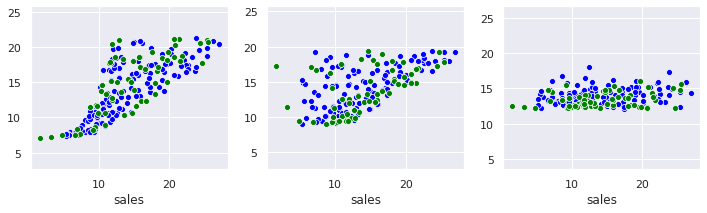

In [53]:
#plot
fig = plt.figure(figsize=(12,3))


plt.subplot(1,3,1)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_tv_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_tv_test, color='green');


plt.subplot(1,3,2)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_radio_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_radio_test, color='green');


plt.subplot(1,3,3)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_news_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_news_test, color='green');

**Comment 1:**

I would expect this plot to look like a straight line (y=x) for a model that explain the data well.


In [74]:
#TV
 #train
res_TV_train = np.subtract(train['sales'],y_pred_tv_train)
 #test
res_TV_test = np.subtract(test['sales'],y_pred_tv_test)
 #sum
res_TV = np.hstack((res_TV_train,res_TV_test))
mean_res_TV = np.mean(res_TV)
print("mean_res_TV: ",mean_res_TV)


#radio
 #train
res_radio_train = np.subtract(train['sales'],y_pred_radio_train)
 #test
res_radio_test = np.subtract(test['sales'],y_pred_radio_test)
 #sum
res_radio = np.hstack((res_radio_train,res_radio_test))
mean_res_radio = np.mean(res_radio)
print("mean_res_radio: ",mean_res_radio)


#newspaper
 #train
res_news_train = np.subtract(train['sales'],y_pred_news_train)
 #test
res_news_test = np.subtract(test['sales'],y_pred_news_test)
 #sum
res_news = np.hstack((res_news_train,res_news_test))
mean_res_news = np.mean(res_news)
print("mean_res_news: ",mean_res_news)

mean_res_TV:  -0.11878975363767567
mean_res_radio:  0.17876459506032938
mean_res_news:  0.31067965908984324


Comment 2:

1.

mean_res_TV:  -0.11878975363767567

mean_res_radio:  0.17876459506032938

mean_res_news:  0.31067965908984324

2.

Zero should be the mean redidual for a well-fitted regression model.

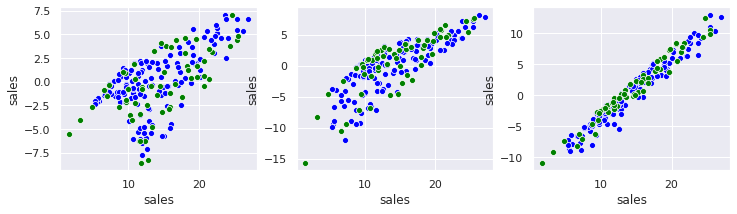

In [76]:
fig = plt.figure(figsize=(12,3))
plt.axis('equal')

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=res_TV_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_TV_test, color='green');


plt.subplot(1,3,2)
sns.scatterplot(data=train, x="sales", y=res_radio_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_radio_test, color='green');


plt.subplot(1,3,3)
sns.scatterplot(data=train, x="sales", y=res_news_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_news_test, color='green');

**Comment 3:**

 The residuals seem to increase linearly as actual sales increase.